In [ ]:
from scipy import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

shared_folder_path = '/content/drive/MyDrive/CCS3/Extracted Data/PreprocessedData/Commercial Movie'
print(os.listdir(shared_folder_path))

['extr_fill_data_Test31.mat', 'extr_fill_data_Test25.mat', 'extr_fill_data_Test19.mat', 'extr_fill_data_Test18.mat', 'extr_fill_data_Test24.mat', 'extr_fill_data_Test30.mat', 'extr_fill_data_Test26.mat', 'extr_fill_data_Test32.mat', 'extr_fill_data_Test33.mat', 'extr_fill_data_Test27.mat', 'extr_fill_data_Test23.mat', 'extr_fill_data_Test37.mat', 'extr_fill_data_Test36.mat', 'extr_fill_data_Test22.mat', 'extr_fill_data_Test08.mat', 'extr_fill_data_Test34.mat', 'extr_fill_data_Test20.mat', 'extr_fill_data_Test21.mat', 'extr_fill_data_Test35.mat', 'extr_fill_data_Test09.mat', 'extr_fill_data_Test127.mat', 'extr_fill_data_Test52.mat', 'extr_fill_data_Test46.mat', 'extr_fill_data_Test47.mat', 'extr_fill_data_Test53.mat', 'extr_fill_data_Test126.mat', 'extr_fill_data_Test130.mat', 'extr_fill_data_Test118.mat', 'extr_fill_data_Test45.mat', 'extr_fill_data_Test51.mat', 'extr_fill_data_Test79.mat', 'extr_fill_data_Test78.mat', 'extr_fill_data_Test50.mat', 'extr_fill_data_Test44.mat', 'extr_fil

# Data preprocessing

In [ ]:
table1 = io.loadmat(shared_folder_path + "/extr_fill_data_Test01.mat")

In [ ]:
import pandas as pd
#df1 = pd.DataFrame(table1)
p = table1["GJP_student"]
x = table1["GJX_student"]
y = table1["GJY_student"]

In [ ]:

df = pd.DataFrame({
    "p": p.ravel(),
    "x": x.ravel(),
    "y": y.ravel()
})
print(df)

              p           x           y
0        1597.0  562.496277  371.598145
1        1599.0  562.596313  371.398163
2        1601.0  562.696350  371.198181
3        1603.0  562.796387  370.998199
4        1605.0  562.896423  370.798218
...         ...         ...         ...
1289995  2709.0  596.700012  378.000000
1289996  2708.0  596.500000  378.000000
1289997  2708.0  596.500000  378.000000
1289998  2708.0  596.599976  377.899994
1289999  2709.0  596.799988  377.799988

[1290000 rows x 3 columns]


In [ ]:
# checking the shapes of the original data
print(f"Original shape of p: {p.shape}")
print(f"Original shape of x: {x.shape}")
print(f"Original shape of y: {y.shape}")

Original shape of p: (1290000, 1)
Original shape of x: (1290000, 1)
Original shape of y: (1290000, 1)


In [ ]:
# assuming data is 1D (1290000,)
# downsampling by taking every 100th element --> 10Hz instead of 1000Hz
def downsample(original_rate, new_rate, data):

    factor = original_rate//new_rate # // --> ti get integer for slicing the dataframe
    downsampled_df = df.iloc[::factor].reset_index(drop = True)

    return downsampled_df

df_10Hz = downsample(1000, 10, df)
df_20Hz = downsample(1000, 20, df)

In [ ]:
eb_list = [340, 1530, 2300, 3600, 4790, 5290, 7000, 7540, 8380, 8610, 8800, 9290, 9650, 10260, 10600, 11130, 11810, 12450, 12870]

def event_boundaries(original_rate, new_rate, eb_list):
    factor = original_rate//new_rate
    event_boundaries = list(event * (100 / factor)  for event in eb_list)
    return event_boundaries

eb_10Hz = event_boundaries(1000, 10, eb_list)

In [ ]:
import numpy as np

def calculate_speed(x_series, y_series):
    '''Todo: check correctness!!!'''
    x_series = np.array(x_series)
    y_series = np.array(y_series)

    previous_x = np.roll(x_series, 1)
    previous_y = np.roll(y_series, 1)

    delta_x = x_series - previous_x
    delta_y = y_series - previous_y

    delta_x[0] = 0
    delta_y[0] = 0

    speed = np.sqrt(delta_x**2 + delta_y**2)

    return speed

s = calculate_speed(x, y)
s_10Hz = calculate_speed(df_10Hz["x"], df_10Hz["y"])

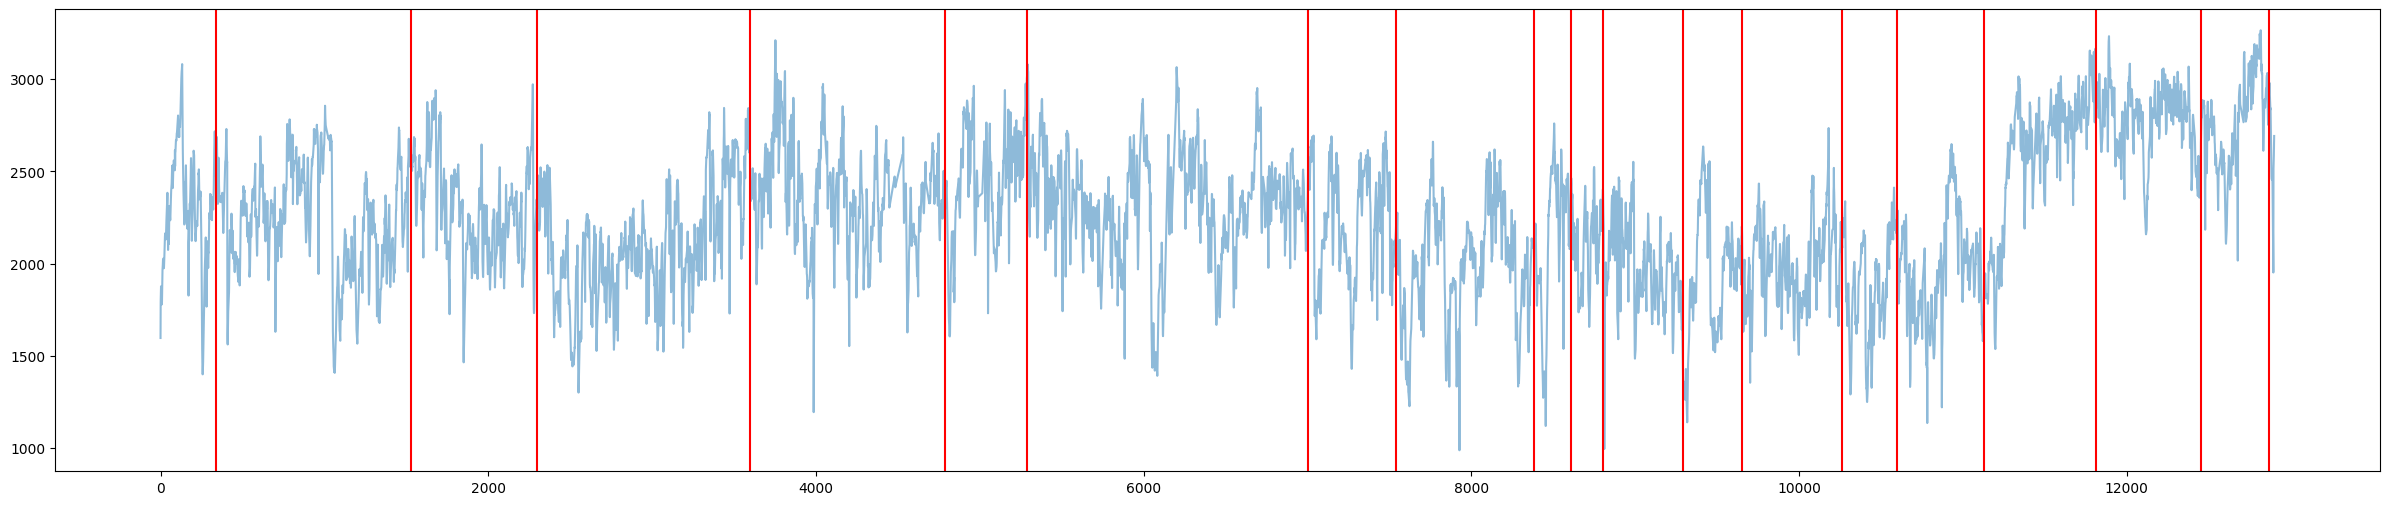

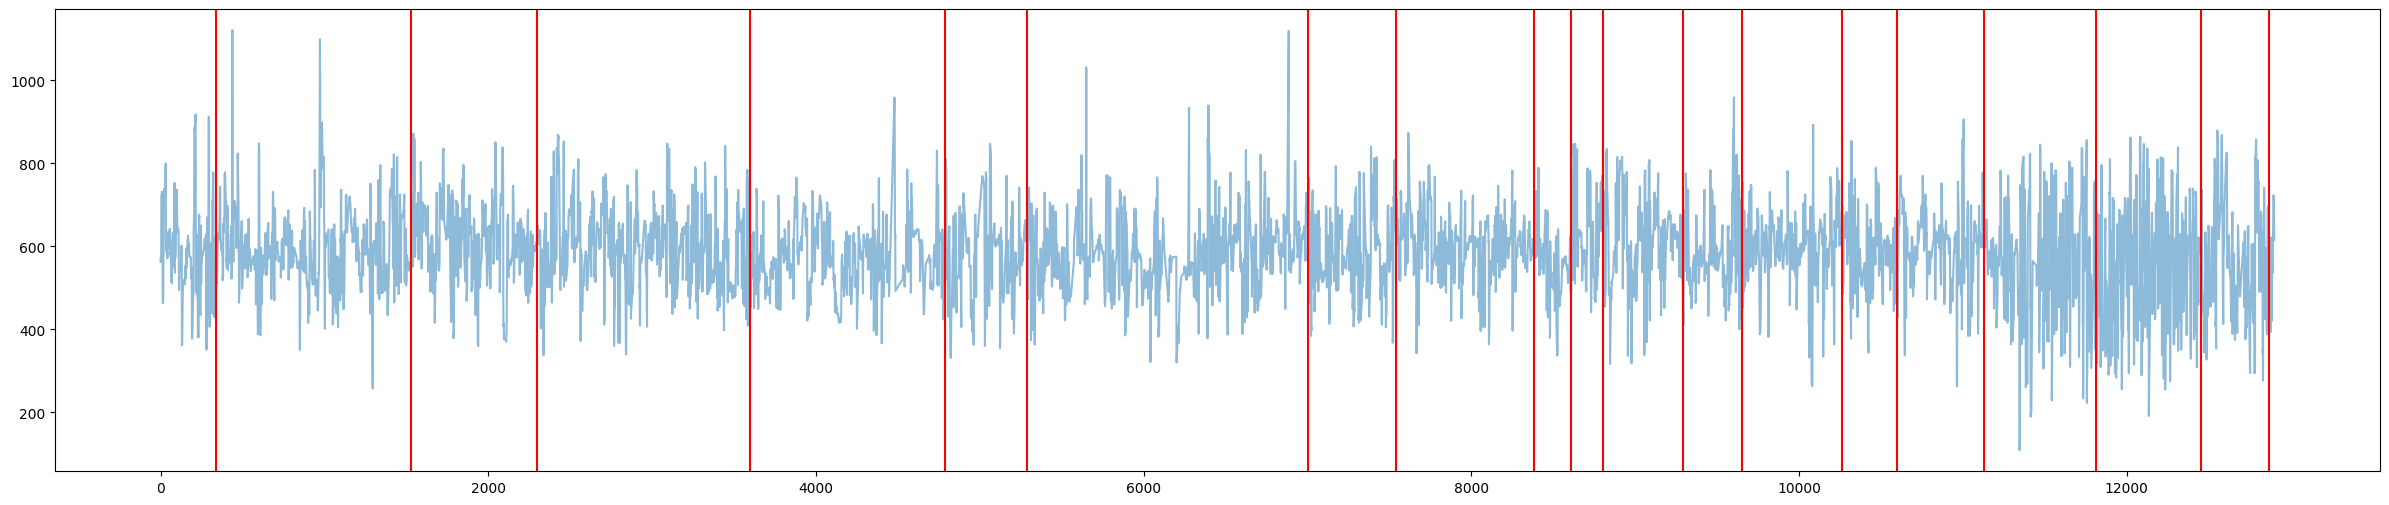

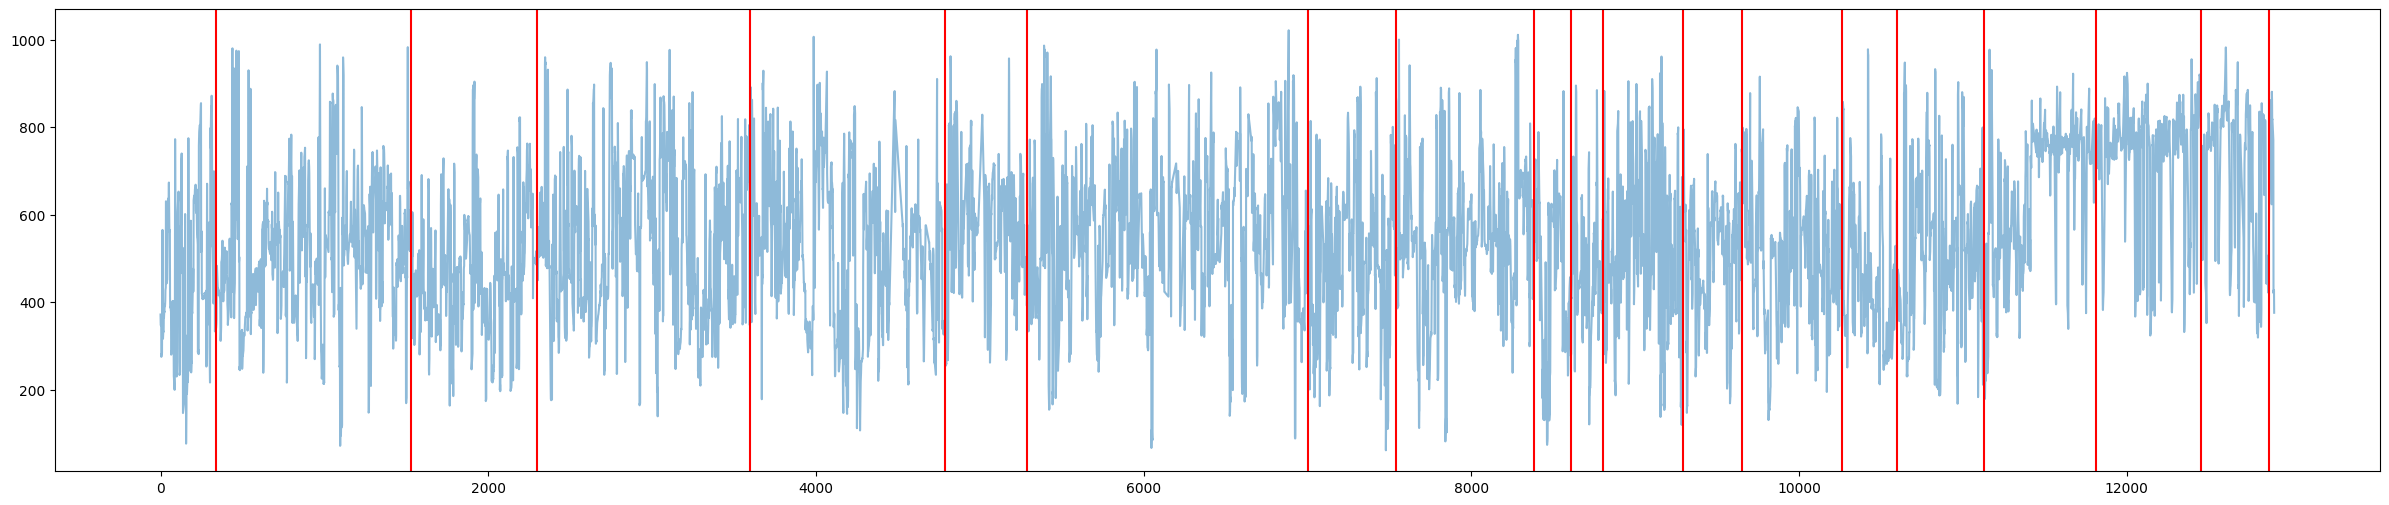

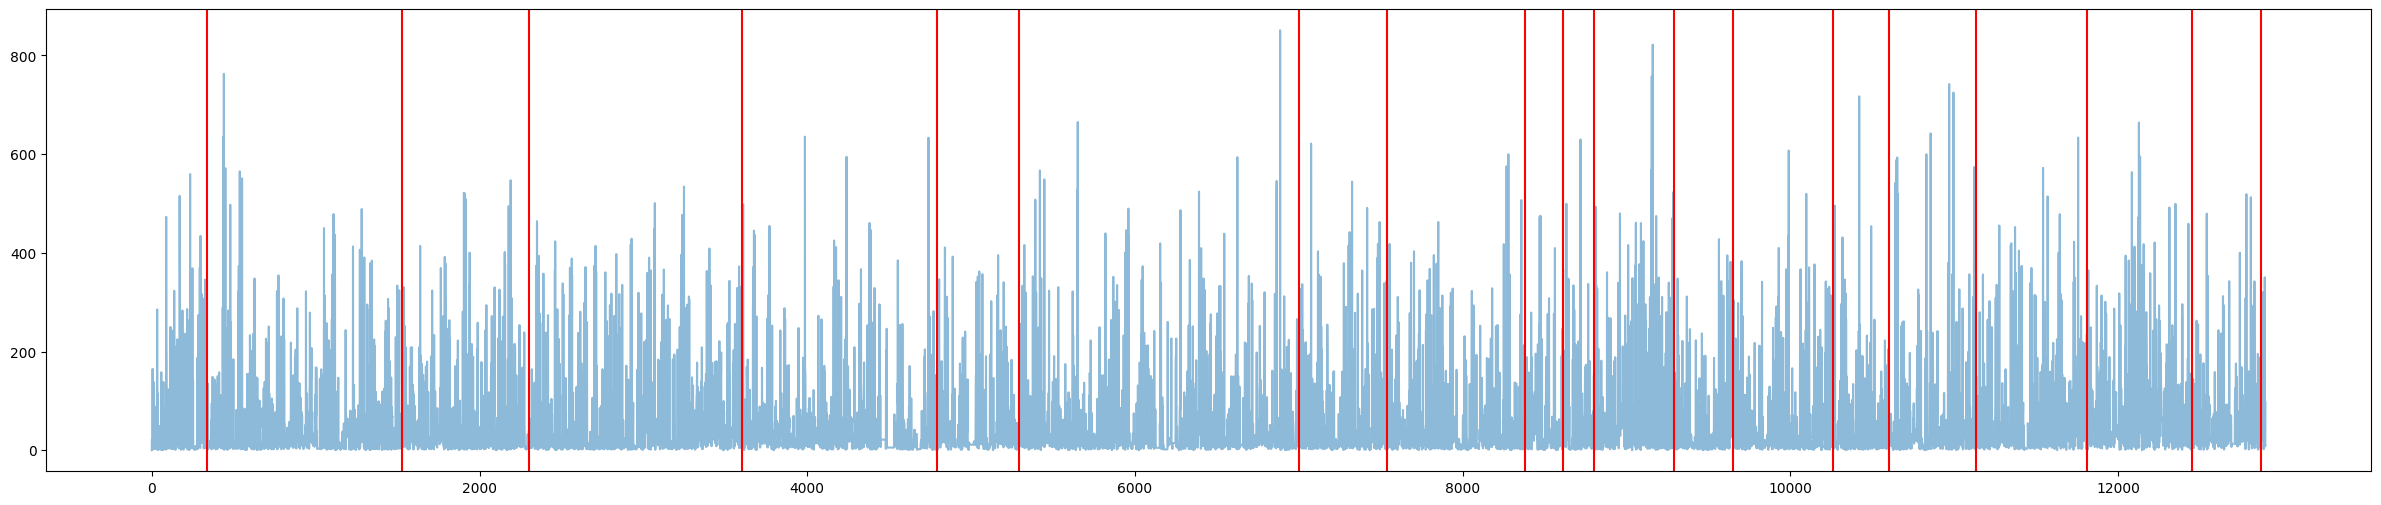

In [ ]:
from matplotlib import pyplot as plt

def plot_series(series, eb_list):
    figure = plt.figure(figsize=(30,6))
    plt.plot(np.arange(len(series)), series, alpha = 0.5)
    for event_boundary in eb_list:
        plt.axvline(event_boundary, color = "r")

plot_series(df_10Hz["p"], eb_10Hz)
plot_series(df_10Hz["x"], eb_10Hz)
plot_series(df_10Hz["y"], eb_10Hz)
plot_series(s_10Hz, eb_10Hz)

In [ ]:
speed = s_10Hz
pupil_size = df_10Hz["p"]
boundaries = eb_10Hz

x_ps = np.vstack((speed, pupil_size)).T

In [ ]:
x_ps.shape

(12900, 2)

340.0
2605.0
(18, 100)


Text(0.5, 1.0, 'Pupil size around the event boundary averaged over all events in 100 steps')

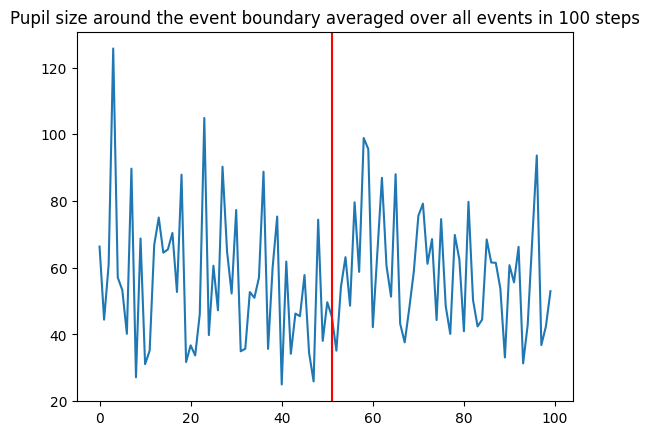

In [ ]:
#data around event boundaries
import numpy as np

#for now use only even numbers
number_time_points = 100

print(boundaries[0])
print(pupil_size[int(boundaries[0])])

time_points_around_events = np.zeros(shape = (len(boundaries) - 1, number_time_points))
for j, event_boundary in enumerate(boundaries[:-1]):

    for i in range(number_time_points):
        #print(j, i)
        data_around_event = speed[int(event_boundary + i - number_time_points/2)]
        time_points_around_events[j, i]= data_around_event


print(np.shape(time_points_around_events))
avg_around_events = np.mean(time_points_around_events, axis = 0)
std_around_events = np.std(time_points_around_events, axis = 0)


plt.plot(avg_around_events)
#plt.plot(avg_around_events - std_around_events)
#plt.plot(avg_around_events + std_around_events)

plt.axvline(number_time_points/2 + 1, c = "r")
plt.title(f"Pupil size around the event boundary averaged over all events in {number_time_points} steps")


In [ ]:

import random
import numpy as np

def sample_events_no_events(
    data,
    event_boundaries,
    num_samples=100
):
    """
    Continuously samples 100-point windows from 'data' until it has
    collected exactly 'num_samples' windows with 0 boundaries (no_events)
    and 'num_samples' windows with exactly 1 boundary (events).

    Parameters
    ----------
    data : np.ndarray
        Shape (N, 2). data[:,0] = speed, data[:,1] = pupil.
    event_boundaries : list or np.ndarray of int
        Indices of event boundaries.
    num_samples : int, optional
        How many samples we want in each list (no_events and events).

    Returns
    -------
    no_events : list of tuples
        Each element is (speed_100, pupil_100), with speed_100.shape = (100,)
        and pupil_100.shape = (100,).
    events : list of tuples
        Same format, but each has exactly 1 event boundary in the slot.
    """
    data_length = data.shape[0]
    if data_length < 100:
        raise ValueError("Data must have at least 100 rows to extract 100-point windows.")

    # Lists to store results
    no_events = []
    events_ = []

    # Convert event_boundaries to a set for faster membership checks, if large
    event_boundaries_set = set(event_boundaries)

    # We'll sample until we have enough in both lists
    # or we reach some iteration limit (to avoid infinite loops).
    max_iterations = 100000  # Arbitrary large limit
    iteration_count = 0

    while (len(no_events) < num_samples or len(events_) < num_samples) and (iteration_count < max_iterations):
        iteration_count += 1

        # 1) Pick a random start index
        start_idx = random.randint(0, data_length - 100)
        end_idx = start_idx + 100

        # 2) Count how many boundaries in [start_idx, end_idx)
        #    We'll just iterate over the set:
        boundaries_in_window = 0
        for b in event_boundaries_set:
            if start_idx <= b < end_idx:
                boundaries_in_window += 1
            if boundaries_in_window > 1:
                break  # no need to count further if it's >1

        # 3) If exactly 0 or exactly 1, store them
        if boundaries_in_window == 0 and len(no_events) < num_samples:
            # Slice out the speed and pupil
            speed_100 = data[start_idx:end_idx, 0]
            pupil_100 = data[start_idx:end_idx, 1]
            no_events.append((speed_100, pupil_100))
        elif boundaries_in_window == 1 and len(events_) < num_samples:
            speed_100 = data[start_idx:end_idx, 0]
            pupil_100 = data[start_idx:end_idx, 1]
            events_.append((speed_100, pupil_100))
        # else ignore if boundaries_in_window >= 2

    return no_events, events_

In [ ]:
# Example usage
time_series = x_ps  # Example time series with 2 channels
event_boundaries = boundaries  # Example boundaries
l = 100  # Length of each subsection
n_samples = 100  # Total number of subsections (must be even)


no_events= []
events = []
sections_with, sections_without = sample_events_no_events(time_series, event_boundaries)

print(sections_without[0][0])

[  3.68915283 115.89583257   8.47700445   5.77059935 469.6900489
  12.93212411   6.96420422  52.28050213   4.45981159  82.31938729
  45.52812232 522.58324829   8.005634    22.53285616 195.52752302
  73.78480518  94.38759161  63.28898368 113.53750553 157.57352363
 157.57352363 120.67684695  36.50200963  83.53141684  83.53141684
  79.15655657   6.47983145   2.83786969   2.83786969   2.83786969
   2.83786969   2.83786969   1.40088553  18.63998879 139.98959932
  16.56802716  12.44027175  12.72866465 347.74346339  29.01465294
   7.95551306 232.99297192  18.45670436   3.45397579 191.69978544
  94.9581321   94.9581321   94.9581321   32.23195182  38.87764371
  50.49038035  50.49038035  50.49038035  50.49038035  44.29679788
  43.72761488  15.09866137 108.73869043   5.92368582   6.33244596
   6.88842572  12.55385663 127.495994    13.07823103  13.40780198
  14.98331042   7.29182491 221.57179054   7.51065877   4.38291597
   5.16236794   4.57931885   4.02244511  80.9896905   10.45608457
  15.945218

In [ ]:
import random

def merge_datasets(no_events, events, shuffle_data=True):
    """
    Merges two lists (no_events, events) into a single preprocessed_data list.
    Each element in preprocessed_data is (speed_100, pupil_100, label).

    Parameters
    ----------
    no_events : list
        Each element is a tuple (speed_100, pupil_100),
        with speed_100.shape = (100,) and pupil_100.shape = (100,).

    events : list
        Same format, but each belongs to exactly 1 boundary window.

    shuffle_data : bool
        If True, shuffle the merged dataset.

    Returns
    -------
    preprocessed_data : list
        A list of tuples (speed_100, pupil_100, label),
        where label=0 for no_events, and label=1 for events.
    """
    preprocessed_data = []

    # Label 0 for no_events
    for (speed_100, pupil_100) in no_events:
        preprocessed_data.append((speed_100, pupil_100, 0))

    # Label 1 for events
    for (speed_100, pupil_100) in events:
        preprocessed_data.append((speed_100, pupil_100, 1))

    # Optionally shuffle
    if shuffle_data:
        random.shuffle(preprocessed_data)

    return preprocessed_data

In [ ]:
merged = merge_datasets(sections_with, sections_without)
print(merged[0][2])


1


merged shape: [samlpes: 200, speed vs pupil vs label: 3, timepoint: 100/ label: 1]    

In [ ]:
# Applying to all participants
import pandas as pd

def get_data(table1):
    p = table1["GJP_student"]
    x = table1["GJX_student"]
    y = table1["GJY_student"]

    df = pd.DataFrame({
        "p": p.ravel(),
        "x": x.ravel(),
        "y": y.ravel()
    })

    df_10Hz = downsample(1000, 10, df)

    s_10Hz = calculate_speed(df_10Hz["x"], df_10Hz["y"])

    speed = s_10Hz
    pupil_size = df_10Hz["p"]
    boundaries = eb_10Hz

    x_ps = np.vstack((speed, pupil_size)).T

    sections_with, sections_without = sample_events_no_events(data = x_ps, event_boundaries = boundaries)

    datasets_merged = merge_datasets(sections_with, sections_without)
    return datasets_merged





In [ ]:
import csv
import os

# Define input folder and output file
input_folder = shared_folder_path  # Adjust the path to your folder
output_file = 'output_file.csv'

df_output = pd.DataFrame(columns = ["participant", "data"])

# Open the output CSV file for writing
with open(output_file, mode='w', newline='') as output_csv:
    writer = csv.writer(output_csv)

    # Iterate over files in the input folder
    for filename in os.listdir(input_folder):
        input_file_path = os.path.join(input_folder, filename)

        # Check if the file is a valid file (not a directory)
        if os.path.isfile(input_file_path):
            table = io.loadmat(input_file_path)
            data = get_data(table)
            new_row = {'participant': filename, 'data': data}
            df_output.loc[len(df_output)] = new_row

print(f"Data from input files has been written to {output_file}.")


ValueError: Unknown mat file type, version 53, 52

In [ ]:
len(df_output["data"])
# data shape: [participants: 105, samlpes: 200, speed vs pupil vs label: 3, timepoint: 100/ label: 1]

In [ ]:
df_output['data'][0][0]

In [ ]:
#df_output.to_csv('output_df.csv', index=False)

# RNN Model

In [ ]:
import torch
import torch.nn as nn

class TwoChannelBoundaryRNN(nn.Module):
    def __init__(self, input_size, hidden_size = 64, num_layers = 2):
        super(TwoChannelBoundaryRNN, self).__init__()

        # RNN for channel 1
        self.rnn1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # RNN for channel 2
        self.rnn2 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer for combined output
        self.fc = nn.Linear(hidden_size * 2, 1)  # Combine both channels' outputs
        self.sigmoid = nn.Sigmoid()

    def forward(self, x1, x2):
        # Process each channel
        h1, _ = self.rnn1(x1)  # Channel 1
        h2, _ = self.rnn2(x2)  # Channel 2

        # Get the last time step's output for both channels
        h1_last = h1[:, -1, :]
        h2_last = h2[:, -1, :]

        # Concatenate the outputs from both channels
        combined = torch.cat((h1_last, h2_last), dim=1)

        # Pass through the fully connected layer
        out = self.fc(combined)
        out = self.sigmoid(out)  # Sigmoid activation for binary classification

        return out

model = TwoChannelBoundaryRNN(1, 100, 2)


In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
df_output["data"][0]
new_list = []
for element in df_output["data"]:
    for subelement in element:
        new_list.append(subelement)


In [ ]:
len(new_list[:100])

In [ ]:
features = list(element[:2] for element in new_list)
labels = list(element[2] for element in new_list)

In [ ]:
np_features = np.array(features)
np_labels = np.array(labels)

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
features = torch.tensor(np_features, dtype=torch.float32)
labels = torch.tensor(np_labels, dtype=torch.float32)


train_features = features[:18000]
train_labels = labels[:18000]
test_features = features[18000:]
test_labels = labels[18000:]

print(train_features.shape)



In [ ]:

# Compute mean and std across all sequences and time points for each channel
train_mean = train_features.mean(dim=(0, 2), keepdim=True)  # Shape: (1, 2, 1)
train_std = train_features.std(dim=(0, 2), keepdim=True)    # Shape: (1, 2, 1)

# Standardize the training data
train_data_standardized = (train_features - train_mean) / train_std


# Apply the same transformation to validation/test data


# Compute mean and std across all sequences and time points for each channel
test_mean = test_features.mean(dim=(0, 2), keepdim=True)  # Shape: (1, 2, 1)
test_std = test_features.std(dim=(0, 2), keepdim=True)    # Shape: (1, 2, 1)

# Standardize the training data

test_data_standardized = (test_features - test_mean) / test_std


In [ ]:
train_data_standardized[0][0]

In [ ]:
# Create the dataset
train_dataset = CustomDataset(train_data_standardized, train_labels)
test_dataset = CustomDataset(test_data_standardized, test_labels)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(train_features.shape, train_labels.shape)

In [ ]:
def calculate_accuracy(model, dataloader, device):
    """
    Calculate accuracy for a given dataloader.

    Args:
        model (torch.nn.Module): The model to evaluate.
        dataloader (torch.utils.data.DataLoader): The dataloader (train/test).
        device (torch.device): The device (CPU/GPU).

    Returns:
        float: Accuracy as a percentage.
    """
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Reshape inputs
            x1 = batch_x[:, 0, :].unsqueeze(-1)  # Channel 1
            x2 = batch_x[:, 1, :].unsqueeze(-1)  # Channel 2

            # Forward pass
            outputs = model(x1, x2)
            predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions

            correct += (predictions.squeeze(1) == batch_y).sum().item()
            total += batch_y.size(0)

    return 100 * correct / total


# Training Loop with Accuracy Calculation
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Move model to device

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_x, batch_y in train_dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()

        # Reshape inputs
        x1 = batch_x[:, 0, :].unsqueeze(-1)  # Channel 1
        x2 = batch_x[:, 1, :].unsqueeze(-1)  # Channel 2

        # Forward pass
        output = model(x1, x2)

        # Compute loss
        loss = loss_fn(output, batch_y.float().unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Calculate train and test accuracy
    train_accuracy = calculate_accuracy(model, train_dataloader, device)
    test_accuracy = calculate_accuracy(model, test_dataloader, device)

    print(f"Epoch {epoch+1}, Loss: {train_loss/len(train_dataloader):.4f}, "
          f"Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


## HMM

In [ ]:
import numpy as np

# Assuming X has shape (21000, 2, 100) and Y has shape (21000,)
X_reshaped = np_features.reshape(21000, -1)  # Flatten the (2, 100) part to (200) for each sequence


In [ ]:
!pip install hmmlearn

In [ ]:
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, np_labels, test_size=0.2, random_state=42)

# Define the number of components (hidden states) in the HMM
n_components = 3  # This can be adjusted; it doesn't directly affect binary classification, but controls model complexity

# Train an HMM for Class 0
model_class_0 = GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000)
X_train_class_0 = X_train[y_train == 0]
model_class_0.fit(X_train_class_0)

# Train an HMM for Class 1
model_class_1 = GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000)
X_train_class_1 = X_train[y_train == 1]
model_class_1.fit(X_train_class_1)

# Now, predict on the test set
# For each sequence in the test set, calculate the log likelihood under both models
log_likelihood_class_0 = np.array([model_class_0.score(X_test[i].reshape(1, -1)) for i in range(X_test.shape[0])])
log_likelihood_class_1 = np.array([model_class_1.score(X_test[i].reshape(1, -1)) for i in range(X_test.shape[0])])

# Assign class 0 if the log-likelihood of class 0 is higher, else assign class 1
y_pred = (log_likelihood_class_1 > log_likelihood_class_0).astype(int)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Testing on own data

In [ ]:
import pandas as pd
folder = '/content/drive/MyDrive/CCS3/CCS3_sherlock.tsv'

In [ ]:
test_df = pd.read_csv(folder, sep='\t')

In [ ]:
column_names = test_df.columns.tolist()
print("Column Names:", column_names)

In [ ]:
recording_times = ["Recording timestamp [ms]", "Participant name"]

In [ ]:
recording_times_df = test_df[recording_times]

In [ ]:
recording_times_df

In [ ]:
timestamps = recording_times_df.groupby('Participant name')['Recording timestamp [ms]'].agg(['first', 'last'])
print("First and Last Recording Timestamps for each participant:")
print(timestamps)

In [ ]:
timestamp_ranges = recording_times_df.groupby('Participant name')['Recording timestamp [ms]'].agg(['first', 'last'])
common_start = timestamp_ranges['first'].max()
common_end = timestamp_ranges['last'].min()

print(f"Common start timestamp: {common_start}")
print(f"Common end timestamp: {common_end}")

filtered_df = recording_times_df[(recording_times_df['Recording timestamp [ms]'] >= common_start) &
                 (recording_times_df['Recording timestamp [ms]'] <= common_end)]

filtered_grouped = filtered_df.groupby("Participant name")
filtered_grouped['Recording timestamp [ms]'].count()

# Pre-processed validation data


In [ ]:
columns_to_keep = ["Participant name", "Recording timestamp [ms]", "Gaze point X [DACS px]", "Gaze point Y [DACS px]", "Pupil diameter filtered [mm]"]

In [ ]:
test_df = test_df[columns_to_keep]
print(test_df)

In [ ]:
test_df['Participant name'] = test_df['Participant name'].str.replace('Participant', '').astype(int)
print(test_df)

In [ ]:
test_df_grouped = test_df.groupby("Participant name")
test_df_grouped['Gaze point X [DACS px]'].count()

In [ ]:
column_names = test_df.columns.tolist()
print("Column Names:", column_names)

In [ ]:
test_df = test_df.rename(columns = {'Gaze point X [DACS px]': 'x', 'Gaze point Y [DACS px]': 'y', 'Pupil diameter filtered [mm]': 'p' })


In [ ]:
test_df

In [ ]:
'''import numpy as np
import pandas as pd

# Example screen resolution
screen_width = 1920
screen_height = 1080

# Calculate center coordinates
center_x = screen_width / 2
center_y = screen_height / 2

# Define a tolerance (in pixels) around the center
tolerance = 30  # Adjust based on precision requirements

# Replace NaN values in the test_df DataFrame
test_df['x'] = test_df['x'].fillna(-1e6)
test_df['y'] = test_df['y'].fillna(-1e6)
test_df['p'] = test_df['p'].fillna(-1e6)

# Filter data points near the center of the screen
test_df['IsFixation'] = (
    (np.abs(test_df['x'] - center_x) <= tolerance) &
    (np.abs(test_df['y'] - center_y) <= tolerance)
)

# Function to find consecutive fixations lasting at least 5 seconds
def find_fixations(group, fixation_duration=2000):
    fixation_indexes = []
    current_fixation = []

    # Iterate through the 'IsFixation' column of the group
    for idx, is_fixated in group['IsFixation'].items():
        if is_fixated:
            current_fixation.append(idx)
        else:
            # Check if the fixation streak is long enough
            if len(current_fixation) >= fixation_duration:
                fixation_indexes.append(current_fixation)
            current_fixation = []

    # Check the last streak
    if len(current_fixation) >= fixation_duration:
        fixation_indexes.append(current_fixation)

    return fixation_indexes

# Apply the function to each participant
fixation_indexes = test_df.groupby('Participant name').apply(lambda group: find_fixations(group))

# Display results
print("Fixation indexes near the center of the screen lasting for at least 5 seconds:")
print(fixation_indexes)'''

In [ ]:
test_df

In [ ]:
test_df['Participant name'] = test_df['Participant name'].astype(str)
print(test_df['Participant name'].dtype)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

participant_1_data = test_df[test_df['Participant name'] == '1']

def plot_series(series):
    figure = plt.figure(figsize=(30,6))
    plt.plot(np.arange(len(series)), series, alpha = 0.5)

p1_data_down = downsample(1000, 10, participant_1_data["x"])
plot_series(participant_1_data["x"])
plot_series(p1_data_down["x"])
#plot_series(df_10Hz["y"], eb_10Hz)
#plot_series(s_10Hz, eb_10Hz)

In [ ]:
import numpy as np

def check_sequence(sequence):
    sampled_sequence = sequence

    # Check for NaNs
    nan_mask = np.isnan(sampled_sequence)
    num_nans = np.sum(nan_mask)

    if num_nans > 10 or nan_mask[0] == True or nan_mask[-1] == True:
        return None

    if num_nans > 0:
        # Impute NaNs using linear interpolation
        for channel in range(sampled_sequence.shape[0]):
            channel_data = sampled_sequence[channel]
            nan_indices = np.where(nan_mask[channel])[0]

            if len(nan_indices) > 0:
                # Get indices of valid (non-NaN) points
                valid_indices = np.where(~nan_mask[channel])[0]
                valid_values = channel_data[valid_indices]

                # Perform linear interpolation
                interpolated_values = np.interp(
                    nan_indices,  # Indices of NaNs to be interpolated
                    valid_indices,  # Indices of existing values
                    valid_values  # Existing values
                )

                # Replace NaNs with interpolated values
                channel_data[nan_indices] = interpolated_values

    return sampled_sequence


In [ ]:
# Filter data for Participant 1

def largest_gap_index(df):
  last_nan_indexes = []

  for participant in df['Participant name'].unique():
    participant_data = df[df['Participant name'] == participant]
    nan_indices = participant_data[participant_data['x'].isna()].index
    nan_blocks = (nan_indices.to_series().diff() > 1).cumsum()
    largest_nan_block = nan_blocks.value_counts().idxmax()
    last_nan_index = nan_indices[nan_blocks == largest_nan_block].max()
    last_nan_indexes.append(last_nan_index)

  return last_nan_indexes

last_nan_indexes_list = largest_gap_index(test_df)
print(last_nan_indexes_list)

In [ ]:
valid_data = []
last_nan_indexes_list = [619703, 2191924, 3806458, 5301065, 6854776, 8633032, 10163262, 11930063]

for i, (participant, group) in enumerate(test_df.groupby('Participant name')):
    # Get the index range for the participant
    index_range = (group.index.min(), group.index.max())

    # Find the index of the first non-NaN value in 'x'
    x_first_non_nan_index = group['x'].first_valid_index()

    a = group.index.max() + 1

    # Append to the result
    valid_data.append({
        'Participant': participant,
        'Index Range': (last_nan_indexes_list[i], group.index.max()),
        'First index': last_nan_indexes_list[i],
        'Last index': group.index.max(),
        'Length': a - last_nan_indexes_list[i]})

# Convert result to a DataFrame for better readability
valid_df = pd.DataFrame(valid_data)

# Display the result
print(valid_df)

In [ ]:
# Initialize an empty DataFrame to store the results
filtered_test_df = pd.DataFrame()

# Iterate through valid_df to filter data for each participant
for _, row in valid_df.iterrows():
    participant = row['Participant']
    first_index = row['First index']
    last_index = row['Last index']

    # Filter the original DataFrame for the participant and index range
    participant_data = test_df[
        (test_df['Participant name'] == participant) &
        (test_df.index >= first_index) &
        (test_df.index <= last_index)
    ]

    # Append the filtered data to the result DataFrame
    filtered_test_df = pd.concat([filtered_test_df, participant_data])

# Reset the index of the resulting DataFrame
filtered_test_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(filtered_test_df)

In [ ]:
data_points_count = filtered_test_df.groupby('Participant name').size()
data_points_count

In [ ]:
b = 1118698/1000/60
b

In [ ]:
valid_df

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

participant_1_data = filtered_test_df[filtered_test_df['Participant name'] == '8']

def plot_series(series):
    figure = plt.figure(figsize=(30,6))
    plt.plot(np.arange(len(series)), series, alpha = 0.5)

plot_series(participant_1_data["x"])
plot_series(participant_1_data["y"])
#plot_series(df_10Hz["y"], eb_10Hz)
#plot_series(s_10Hz, eb_10Hz)

In [ ]:
filtered_test_df

In [ ]:
'''# Get index range and first non-NaN index for each participant
result = []
for participant, group in test_df.groupby('Participant name'):
    # Get the index range for the participant
    index_range = (group.index.min(), group.index.max())

    # Find the index of the first non-NaN value in 'x'
    first_non_nan_index = group['x'].first_valid_index()

    # Append to the result
    result.append({
        'Participant': participant,
        'Index Range': index_range,
        'First Non-NaN Index': first_non_nan_index,
        'Index number': first_non_nan_index - index_range[0]
    })

# Convert result to a DataFrame for better readability
result_df = pd.DataFrame(result)

# Display the result
print(result_df)'''

In [ ]:
def calculate_speed(x_series, y_series):
    '''Todo: check correctness!!!'''
    x_series = np.array(x_series)
    y_series = np.array(y_series)

    previous_x = np.roll(x_series, 1)
    previous_y = np.roll(y_series, 1)

    delta_x = x_series - previous_x
    delta_y = y_series - previous_y

    delta_x[0] = 0
    delta_y[0] = 0

    speed = np.sqrt(delta_x**2 + delta_y**2)

    return speed

s = calculate_speed(test_df['x'], test_df['y'])

In [ ]:
from matplotlib import pyplot as plt

def plot_series(series, eb_list):
    figure = plt.figure(figsize=(30,6))
    plt.plot(np.arange(len(series)), series, alpha = 0.5)
    for event_boundary in eb_list:
        plt.axvline(event_boundary, color = "r")

plot_series(test_df["p"], eb_10Hz)
plot_series(df_10Hz["x"], eb_10Hz)
plot_series(df_10Hz["y"], eb_10Hz)
plot_series(s_10Hz, eb_10Hz)

# Internal data preprocessing

In [ ]:
import pandas as pd
internal_data_path = '/content/drive/MyDrive/internal_data.csv'
internal_data = pd.read_csv(internal_data_path, sep=',')

In [ ]:
internal_data

In [ ]:
participants_to_use = [1, 3, 4, 5, 6, 7, 8]
for participant in participants_to_use:
  participant_data = internal_data[internal_data["Participant name"] == participant]
  participant_data["s"] = calculate_speed(participant_data["x"], participant_data["y"])
  internal_data.loc[internal_data["Participant name"] == participant, "s"] = participant_data["s"]

In [ ]:
def check_sequence(sequence):
    """
    Checks if the sequence has no more than 10 NaNs and imputes them
    with smooth transitions (linear interpolation).
    Returns None if more than 10 NaNs are found; otherwise, returns the imputed sequence.
    """
    sequence = np.asarray(sequence, dtype=np.float64)  # Ensure numeric type

    # Check for NaNs
    nan_mask = np.isnan(sequence)
    num_nans = np.sum(nan_mask)

    if num_nans > 10:
        return None  # Too many NaNs to process

    if num_nans > 0:
        # Interpolate NaNs
        nan_indices = np.where(nan_mask)[0]
        valid_indices = np.where(~nan_mask)[0]
        valid_values = sequence[valid_indices]
        sequence[nan_indices] = np.interp(nan_indices, valid_indices, valid_values)

    return sequence


In [ ]:

import random
import numpy as np

def sample_events_no_events_internal(
    data,
    event_boundaries,
    num_samples=100
):

    data_length = data.shape[0]
    if data_length < 100:
        raise ValueError("Data must have at least 100 rows to extract 100-point windows.")

    # Lists to store results
    no_events = []
    events_ = []

    # Convert event_boundaries to a set for faster membership checks, if large
    event_boundaries_set = set(event_boundaries)

    # We'll sample until we have enough in both lists
    # or we reach some iteration limit (to avoid infinite loops).
    max_iterations = 10000000  # Arbitrary large limit
    iteration_count = 0

    while (len(no_events) < num_samples or len(events_) < num_samples):
        iteration_count += 1

        # 1) Pick a random start index
        start_idx = random.randint(0, data_length - 100)
        end_idx = start_idx + 100

        # 2) Count how many boundaries in [start_idx, end_idx)
        #    We'll just iterate over the set:
        boundaries_in_window = 0
        for b in event_boundaries_set:
            if start_idx <= b < end_idx:
                boundaries_in_window += 1
            if boundaries_in_window > 1:
                break  # no need to count further if it's >1

        # 3) If exactly 0 or exactly 1, store them
        if boundaries_in_window == 0 and len(no_events) < num_samples:
            # Slice out the speed and pupil
            speed_100 = data[start_idx:end_idx, 0]
            pupil_100 = data[start_idx:end_idx, 1]
            if not check_sequence(speed_100) is None and not check_sequence(pupil_100) is None:
              no_events.append((speed_100, pupil_100))
        elif boundaries_in_window == 1 and len(events_) < num_samples:
            speed_100 = data[start_idx:end_idx, 0]
            pupil_100 = data[start_idx:end_idx, 1]
            if not check_sequence(speed_100) is None and not check_sequence(pupil_100) is None:
              events_.append((speed_100, pupil_100))
        # else ignore if boundaries_in_window >= 2

    return no_events, events_

In [ ]:
internal_eb_list = [34, 97, 144, 178, 308, 380, 435, 597, 627, 638, 690, 798, 855]
internal_eb_10Hz = list(i*10 for i in internal_eb_list)


In [ ]:
def remove_comma(number_str):
  number_float = float(str(number_str).replace(",", ""))
  return number_float

internal_data["p"] = internal_data["p"].apply(remove_comma)
internal_data

In [ ]:
data_internal = internal_data[internal_data["Participant name"] == 4][["s", "p"]]
data_internal

In [ ]:
data_internal = internal_data[internal_data["Participant name"] == 1][["s", "p"]]
data_internal = data_internal.to_numpy(dtype=np.float64)

no_events, events = sample_events_no_events_internal(data_internal, internal_eb_10Hz)
dataset = merge_datasets(no_events, events)
len(dataset)

## SAmpling


In [ ]:

df_output_internal = pd.DataFrame(columns=['participant', 'data'])
for participant in [3]:
  data_internal = internal_data[internal_data["Participant name"] == participant][["s", "p"]]
  data_internal = data_internal.to_numpy(dtype=np.float64)
  no_events, events = sample_events_no_events_internal(data_internal, internal_eb_10Hz)
  dataset = merge_datasets(no_events, events)
  new_row = {'participant': participant, 'data': dataset}
  df_output_internal.loc[len(df_output_internal)] = new_row




In [ ]:
#df_output_internal_final.loc[len(df_output_internal_final)] = [new_row["participant"], new_row["data"]]

In [ ]:
df_output_internal_final

In [ ]:
new_list_internal = []
for element in df_output_internal["data"]:
    for subelement in element:
        new_list_internal.append(subelement)


In [ ]:
len(df_output_internal['data'][0])

In [ ]:
len(new_list_internal)

In [ ]:
new_list_internal[0][0]

In [ ]:
test_features = list(element[:2] for element in new_list_internal)
test_labels = list(element[2] for element in new_list_internal)

In [ ]:
len(test_features)

In [ ]:
np_test_features = np.array(test_features)
np_test_labels = np.array(test_labels)

In [ ]:
len(np_test_labels)

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = test_features
        self.labels = test_labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype = torch.float32), torch.tensor(self.labels[idx], dtype = torch.float32)

In [ ]:
test_features_internal = torch.tensor(np_features, dtype=torch.float32)
test_labels_internal = torch.tensor(np_labels, dtype=torch.float32)

print(test_labels_internal.shape)

In [ ]:
test_features_internal = torch.tensor(np_test_features, dtype=torch.float32)
test_labels_internal = torch.tensor(np_test_labels, dtype=torch.float32)

print(test_labels_internal.shape)

In [ ]:

# Compute mean and std across all sequences and time points for each channel
test_mean = test_features_internal.mean(dim=(0, 2), keepdim=True)  # Shape: (1, 2, 1)
test_std = test_features_internal.std(dim=(0, 2), keepdim=True)    # Shape: (1, 2, 1)

# Standardize the training data

test_data_standardized = (test_features_internal - test_mean) / test_std


In [ ]:
# Create the dataset
test_dataset = CustomDataset(test_data_standardized, test_labels_internal)


In [ ]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
test_data_standardized.shape

In [ ]:
test_accuracy = calculate_accuracy(model, test_dataloader, device)
print(test_accuracy)

## Testing HMM on own data


In [ ]:
len(np_test_features[0][0])

In [ ]:
np_test_features

In [ ]:
X_reshaped = np_test_features.reshape(200, -1)  # Flatten the (2, 100) part to (200) for each sequence
_, X_test, _, y_test = train_test_split(X_reshaped, np_labels, test_size=0.2, random_state=42)

In [ ]:
log_likelihood_class_0 = np.array([model_class_0.score(X_test[i].reshape(1, -1)) for i in range(X_test.shape[0])])
log_likelihood_class_1 = np.array([model_class_1.score(X_test[i].reshape(1, -1)) for i in range(X_test.shape[0])])

# Assign class 0 if the log-likelihood of class 0 is higher, else assign class 1
y_pred = (log_likelihood_class_1 > log_likelihood_class_0).astype(int)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Data standardization

In [ ]:
test_data_standardized[6][0]

In [ ]:
train_data_standardized[6][0]